In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def read_file(file_name):
    all_df = {}
    all_average = {}
    with open(file_name) as f:
        for i in range(6):
            name = f.readline().strip()
            column_name_string = f.readline()
            column_names = column_name_string.strip().split(",")
            check = True
            result={}
            for cl_name in column_names:
                result[cl_name] = []

            while check:
                line = f.readline()
                line_value = line.strip().split(",")
                if line_value[0] == "Average":
                    average_auc = float(line_value[1])
                    average_pauc = float(line_value[2])
                elif line=="\n":
                    break
                else:
                    for i, cl_name in enumerate(column_names):
                        result[cl_name].append(float(line_value[i]))

            all_df[name] = pd.DataFrame(result)
            all_average[name] = {"average_auc":average_auc, "average_pauc":average_pauc}
    return all_df, all_average

In [27]:
baseline_file = "./result/result_tf/result_tf.csv"
baseline_dfs, baseline_avgs = read_file(baseline_file)

check_file = "./result/result_tf/result_tf.csv"
check_dfs, check_avgs = read_file(check_file)

In [28]:
baseline_auc = [item["average_auc"] for item in baseline_avgs.values()]
check_auc = [item["average_auc"] for item in check_avgs.values()]
label = [item for item in baseline_avgs.keys()]
df = {}
for i, value in enumerate(label):
    df[value] = [baseline_auc[i], check_auc[i]]

df = pd.DataFrame(df, index=["baseline","our_model"])
df

,ToyCar,ToyConveyor,fan,pump,slider,valve
baseline,0.777086,0.72465,0.655985,0.727541,0.844937,0.654717
our_model,0.777086,0.72465,0.655985,0.727541,0.844937,0.654717


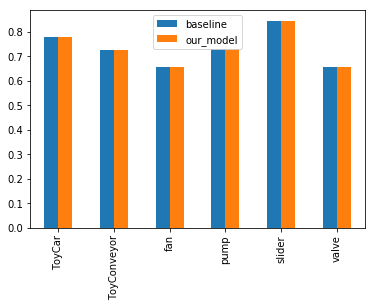

In [29]:
df.T.plot.bar()